# Normalize Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
data = np.load('../../data/processed/combined_data.npz')
combined_data = data['combined_data']
labels = data['labels']

## OLD: Remove ARIMA

In [15]:
new_combined_data = np.delete(combined_data, 1, 1)
print(combined_data[0])
print(new_combined_data[0])

[[1.847      1.759      1.935      ... 2.033      1.897      1.86      ]
 [1.847      1.84700004 1.73274903 ... 2.09559314 2.00943379 1.86      ]
 [2.43076644 2.43076644 2.43076644 ... 2.43076644 2.43076644 2.43076644]
 [2.12656458 2.12706416 2.12756659 ... 2.12508291 2.12557395 2.12606784]
 [1.8502078  1.85168554 1.85338454 ... 1.8470174  1.84788189 1.84894269]
 [1.89209252 1.87053825 1.84972515 ... 1.96842921 1.94246249 1.91596448]]
[[1.847      1.759      1.935      ... 2.033      1.897      1.86      ]
 [2.43076644 2.43076644 2.43076644 ... 2.43076644 2.43076644 2.43076644]
 [2.12656458 2.12706416 2.12756659 ... 2.12508291 2.12557395 2.12606784]
 [1.8502078  1.85168554 1.85338454 ... 1.8470174  1.84788189 1.84894269]
 [1.89209252 1.87053825 1.84972515 ... 1.96842921 1.94246249 1.91596448]]


In [5]:
min_val, max_val = np.min(combined_data, axis=(1, 2)), np.max(combined_data, axis=(1, 2))
min_val, max_val = np.expand_dims(min_val, axis=-1), np.expand_dims(max_val, axis=-1)
min_val, max_val = np.expand_dims(min_val, axis=-1), np.expand_dims(max_val, axis=-1)
# Make in in the [0, 1] interval
normalized_data = (combined_data - min_val) / (max_val - min_val) 
# Make in the [-1, 1] interval
normalized_data = (normalized_data - 0.5) * 2

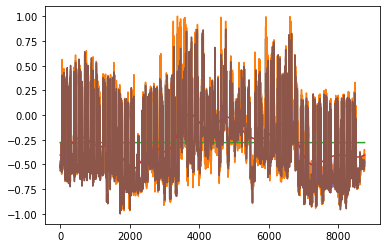

In [6]:
plt.plot(normalized_data[0][0])
plt.plot(normalized_data[0][1])
plt.plot(normalized_data[0][2])
plt.plot(normalized_data[0][3])
plt.plot(normalized_data[0][4])
plt.plot(normalized_data[0][5])

In [45]:
np.savez_compressed('../../data/processed/full_data.npz', electrical_data=normalized_data, labels=labels)

## Edit: Reshape from (507, 5, 8760) to (507, 8760, 5)

In [4]:
#data = np.load('../../data/processed/normalized_data.npz')
#data = np.load('../../data/processed/full_data.npz')
data = np.load('../../data/processed/full_generated_data.npz')
electrical_data = data['electrical_data']
labels = data['labels']
print(electrical_data.shape)

(5000, 6, 8760)


In [5]:
new_electrical_data = [None] * len(electrical_data)
for i, elec_row in enumerate(electrical_data):
    elec = elec_row[0]
    arima = elec_row[1]
    fft1 = elec_row[2]
    fft10 = elec_row[3]
    fft100 = elec_row[4]
    fft1000 = elec_row[5]
    new_electrical_data[i] = np.concatenate([np.expand_dims(elec, -1), np.expand_dims(arima, -1), np.expand_dims(fft1, -1), \
                             np.expand_dims(fft10, -1), np.expand_dims(fft100, -1), np.expand_dims(fft1000, -1)], -1)
new_electrical_data = np.array(new_electrical_data)
print(new_electrical_data.shape)

(5000, 8760, 6)


In [6]:
#np.savez_compressed('../../data/processed/enriched_data.npz', electrical_data=new_electrical_data, labels=labels)
#np.savez_compressed('../../data/processed/full_data.npz', electrical_data=new_electrical_data, labels=labels)
np.savez_compressed('../../data/processed/normalized_generated_data.npz', electrical_data=new_electrical_data, labels=labels)